<a href="https://colab.research.google.com/github/6058ah/BusinessCapstone/blob/master/%EB%89%B4%EC%8A%A4%EB%8D%B0%EC%9D%B4%ED%84%B0_%ED%81%AC%EB%A1%A4%EB%A7%81_%EB%B0%8F_%EA%B0%90%EC%84%B1%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install xlsxwriter

     |████████████████████████████████| 153kB 5.0MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
from bs4 import BeautifulSoup
from datetime import datetime
import requests
import pandas as pd
import re

'''''''''''''''''''''''''''''''''''''''''''''''''''''''''
< naver 뉴스 검색시 리스트 크롤링하는 프로그램 > _select사용
- 크롤링 해오는 것 : 링크,제목,신문사,내용요약본
- 내용요약본  -> 정제 작업 필요
- 리스트 -> 딕셔너리 -> df -> 엑셀로 저장
'''''''''''''''''''''

title_text=[]
contents_text=[]
dates_text = []
#result=[]

#엑셀로 저장하기 위한 변수
RESULT_PATH ='/content/drive'  #결과 저장할 경로

#날짜 범위 리스트로 만들기
def date_range(start, end):
    start = datetime.strptime(start, "%Y.%m.%d")
    end = datetime.strptime(end, "%Y.%m.%d")
    dates = [date.strftime("%Y.%m.%d") for date in pd.date_range(start, periods=(end-start).days+1)]
    return dates

#def contents_cleansing(contents):
#    first_cleansing_contents = re.sub('<dl>.*?</a> </div> </dd> <dd>', '',str(contents)).strip()  #앞에 필요없는 부분 제거
#    second_cleansing_contents = re.sub('<ul class="relation_lst">.*?</dd>', '', first_cleansing_contents).strip()#뒤에 필요없는 부분 제거 (새끼 기사)
#    third_cleansing_contents = re.sub('<.+?>', '', second_cleansing_contents).strip()
#    contents_text.append(third_cleansing_contents)
#    #print(contents_text)

#크롤링 시작
def crawler(query,s_date,e_date):
  dates= date_range(s_date,e_date)
  page_num = [1,11,21,31,41]
  #maxpage_t =41
  for x in dates:
    #print(x)
    for page_number in page_num:
      ds = x.replace(".","")
      de = ds
      url = "https://search.naver.com/search.naver?where=news&query=" + query + "&sort=0"+"&ds=" + x + "&de=" + x + "&nso=so%3Ar%2Cp%3Afrom" + ds + "to" + de + "%2Ca%3A&start=" + str(page_number)
      #url = "https://search.naver.com/search.naver?&where=news&query={0}&sm=tab_pge&sort={1}&photo=0&field=0&reporter_article=&pd=3&ds={2}&de={2}&docid=&nso=so:r,p:,a:all&mynews=1&cluster_rank=238&start={3}&refresh_start=0".format(query,sort,x,str(page_num))
      #print(url)
      response = requests.get(url)
      html = response.text

      #뷰티풀소프의 인자값 지정
      soup = BeautifulSoup(html, 'html.parser')

      #뉴스 날짜
#      bbs = soup.find_all('span', 'info')
#      for bb in bbs:
#        t = bb.text
#        dates_text.append(t)
#      search = "면"
#      for word in dates_text:
#        if search in word: 
#          dates_text.remove(word)


      #<a>태그에서 제목과 링크주소 (a 태그 중 class 명이 news_tit인 것)
      atags = soup.find_all('a', 'news_tit')
      for atag in atags:
        title = atag.get('title')
        title_text.append(title)     #제목
        dates_text.append(x)
            
      #본문요약본 (a 태그 중 class 명이 api_txt_lines dsc_txt_wrap인 것)
      #contents_lists = soup.find_all('a','api_txt_lines dsc_txt_wrap')
      #for contents_list in contents_lists:
      #  contents_cleansing(contents_list) #본문요약 정제화


      #모든 리스트 딕셔너리형태로 저장
      #result= {"Date":dates_text,"title":title_text}
      df1 = pd.DataFrame(dates_text)
      df2 = pd.DataFrame(title_text) #df로 변환
      result = pd.concat([df1,df2],axis=1)
      #print(result)

  outputFileName = '{0}~{1} {2} 관련 뉴스.xlsx'.format(s_date.replace(".",""), e_date.replace(".",""), query)
  writer = pd.ExcelWriter(outputFileName, engine='xlsxwriter')
  result.to_excel(writer, sheet_name= '{0}~{1} {2} 뉴스'.format(s_date.replace(".",""), e_date.replace(".",""), query))
  writer.save()

#메인함수
def main():
    info_main = input("="*50+"\n"+"입력 형식에 맞게 입력해주세요."+"\n"+" 시작하시려면 Enter를 눌러주세요."+"\n"+"="*50)
    query = input("검색어 입력: ") #네이버, 부동산...
    s_date = input("시작날짜 입력(예시:2019.01.01):")
    e_date = input("끝날짜 입력:")
    crawler(query,s_date,e_date)
  

In [ ]:
#2차전지산업, 2019.01.01~2021.05.03로 입력
main()

입력 형식에 맞게 입력해주세요.
 시작하시려면 Enter를 눌러주세요.
검색어 입력: 2차전지산업
시작날짜 입력(예시:2019.01.01):2019.01.01
끝날짜 입력:2019.01.03


#참고
##https://hansuho113.tistory.com/3?category=913503
##https://adsp-ggini.tistory.com/80

##감성분석

In [5]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.9MB/s 
     |████████████████████████████████| 92kB 8.0MB/s 
     |████████████████████████████████| 460kB 43.3MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [6]:
!git clone https://github.com/FinanceData/corpus.git

Cloning into 'corpus'...
remote: Enumerating objects: 11, done.
remote: Total 11 (delta 0), reused 0 (delta 0), pack-reused 11
Unpacking objects: 100% (11/11), done.


In [7]:
from konlpy.tag import Kkma

engine = Kkma()
polarity_dic = pd.read_csv('corpus/kosac/polarity.csv')
polarity_dic.set_index('ngram', inplace=True)

def polarity_score(text):
    pos_tags = engine.pos(text)

    # n-gram
    unigram = ['/'.join(p) for p in pos_tags]
    bigram = [';'.join(z) for z in zip(unigram, unigram[1:])]
    trigram = [';'.join(z) for z in zip(*[unigram[i:] for i in range(3)])]
    
    p_score = 0
    # polarity score = (p-n) / (p+n)
    for ngram in [unigram, bigram, trigram]:
        cond = polarity_dic.index.isin(ngram)
        s = polarity_dic.loc[cond, :].sum()
        if s['POS'] + s['NEG'] > 0: # div 0 방지
            p_score += (s['POS'] - s['NEG']) / (s['POS'] + s['NEG'])
    return p_score

In [8]:
news = pd.read_excel('/content/20190101_20210503 2차전지산업 관련 뉴스.xlsx')

In [9]:
news.head()

,Unnamed: 0,0,0.1
0,0,2019.01.01,전기차 보급 확대에…2차전지株 훈풍 부나
1,1,2019.01.01,"""내년 2차전지 EV배터리 성장…삼성SDI·에코프로 주목"""
2,2,2019.01.01,"[제조업 위기속 미래를 꿈꾸는 기업]포스코켐텍 ""ESM과 합병···2차전지 소재 飛..."
3,3,2019.01.01,"""코스피, 2분기 '반등'…코스닥은 4차산업 등 성장주 유망"""
4,4,2019.01.01,"성윤모 산업장관 ""2년 연속 수출 6천억달러 달성하겠다"""


In [10]:
news.columns = ['Count', 'Date', 'Title']
news.head()

,Count,Date,Title
0,0,2019.01.01,전기차 보급 확대에…2차전지株 훈풍 부나
1,1,2019.01.01,"""내년 2차전지 EV배터리 성장…삼성SDI·에코프로 주목"""
2,2,2019.01.01,"[제조업 위기속 미래를 꿈꾸는 기업]포스코켐텍 ""ESM과 합병···2차전지 소재 飛..."
3,3,2019.01.01,"""코스피, 2분기 '반등'…코스닥은 4차산업 등 성장주 유망"""
4,4,2019.01.01,"성윤모 산업장관 ""2년 연속 수출 6천억달러 달성하겠다"""


In [11]:
news.loc[:,'Title']

0                                   전기차 보급 확대에…2차전지株 훈풍 부나
1                         "내년 2차전지 EV배터리 성장…삼성SDI·에코프로 주목"
2        [제조업 위기속 미래를 꿈꾸는 기업]포스코켐텍 "ESM과 합병···2차전지 소재 飛...
3                       "코스피, 2분기 '반등'…코스닥은 4차산업 등 성장주 유망"
4                          성윤모 산업장관 "2년 연속 수출 6천억달러 달성하겠다"
                               ...                        
24450                    거래소, 2021 코넥스 신성장산업 릴레이 비대면 IR 개최
24451                          경찰청, 6개월간 산업기술 해외 유출사범 특별단속
24452                    거래소, 코넥스시장 활성화 위해 ‘릴레이 비대면 IR’ 개최
24453                   신한금융투자 "SK머티리얼즈, 전방산업 호조에 매출 확대 중"
24454              ‘재계 50위권’ LX홀딩스 논란 딛고 공식 출범…구본준 3년만에 복귀
Name: Title, Length: 24455, dtype: object

In [12]:
news_scores = []
for i in news.loc[:,'Title']:
  news_score = polarity_score(i)
  #print(news_score)
  news_scores.append(news_score)

In [17]:
news_scores_df = pd.DataFrame(data = news_scores, columns=['Score'])

In [18]:
news_scores_df

,Score
0,1.000000
1,0.714286
2,0.027491
3,-0.386589
4,-0.150030
...,...
24450,0.500000
24451,-0.333333
24452,-0.142336
24453,0.333333


In [19]:
result = pd.concat([news,news_scores_df],axis=1)
result.head()

,Count,Date,Title,Score
0,0,2019.01.01,전기차 보급 확대에…2차전지株 훈풍 부나,1.000000
1,1,2019.01.01,"""내년 2차전지 EV배터리 성장…삼성SDI·에코프로 주목""",0.714286
2,2,2019.01.01,"[제조업 위기속 미래를 꿈꾸는 기업]포스코켐텍 ""ESM과 합병···2차전지 소재 飛...",0.027491
3,3,2019.01.01,"""코스피, 2분기 '반등'…코스닥은 4차산업 등 성장주 유망""",-0.386589
4,4,2019.01.01,"성윤모 산업장관 ""2년 연속 수출 6천억달러 달성하겠다""",-0.150030


In [26]:
result.loc[result['Date']=='2019.01.01','Score'].mean()

0.34520448402841236

In [59]:
dr = date_range('2019.01.01','2021.05.03')
mean_text = []
for i in dr:
  Smean = result.loc[result['Date']==i,'Score'].mean()
  mean_text.append(Smean)

df1= pd.DataFrame(dr)
df2= pd.DataFrame(mean_text)

date_mean_score = pd.concat([df1,df2],axis=1)

In [68]:
date_mean_score.columns = ['Date','Score']
type(date_mean_score)

pandas.core.frame.DataFrame

In [66]:
date_mean_score.to_excel('20190101_20210503 2차전지산업 관련 뉴스 감성점수.xlsx')

In [70]:
date_mean_score

,Date,Score
0,2019.01.01,0.345204
1,2019.01.02,0.104540
2,2019.01.03,-0.018915
3,2019.01.04,0.256299
4,2019.01.05,-0.529001
...,...,...
849,2021.04.29,0.121223
850,2021.04.30,0.496268
851,2021.05.01,0.109544
852,2021.05.02,0.155065


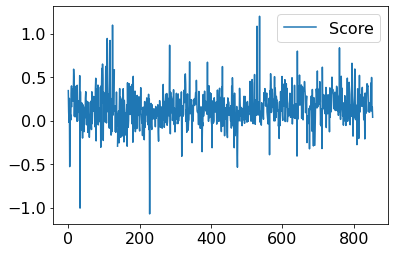

In [69]:
date_mean_score.plot()